In [154]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline
import traitlets
import seaborn as sns
import plotly.graph_objects as go

In [155]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [156]:
df = pd.read_csv("ATP.csv")

# Created new column to extract 'Tournament Year'

In [157]:
df['tourney_yearmonth'] = df.tourney_date.astype(str).str[:6]
df['tourney_year'] = df.tourney_date.astype(str).str[:4]
df['tourney_year'] = df['tourney_year'].astype(int)

In [158]:
winners = df['winner_name'].value_counts()
losers = df['loser_name'].value_counts()

winners_df = pd.DataFrame(df['winner_name'].value_counts())
winners_df['name'] = winners_df.index
winners_df['win_count'] = winners_df['winner_name']
winners_df.drop(['winner_name'], axis = 1, inplace = True)
winners_df.reset_index(inplace = True, drop = True)

In [159]:
losers_list = winners_df['name'].to_list()
losers = losers.reindex(losers_list, axis = 0)

In [160]:
winners_df['lost_count'] = losers.values

In [161]:
winners_df['total'] = winners_df['win_count'] + winners_df['lost_count']

In [162]:
new_df = winners_df.iloc[0:10]

In [163]:
fserves = df['w_1stIn'].value_counts()

In [164]:
fserves_list = winners_df['name'].to_list()
fserves = fserves.reindex(fserves_list, axis = 0)

In [165]:
winner_hands= pd.DataFrame(df.winner_hand.value_counts())

In [166]:
loser_hands= pd.DataFrame(df.loser_hand.value_counts())

In [167]:
x= winner_hands + loser_hands

In [168]:
df_xyz= winner_hands.copy()

In [169]:
df_xyz['new'] = loser_hands['loser_hand']

In [170]:
df_xyz.new

R    142806
L     22673
U      4126
Name: new, dtype: int64

In [171]:
hands= pd.concat([winner_hands,loser_hands], axis = 1)

In [172]:
hands['total_matches_played']= hands['winner_hand']+ hands['loser_hand']

In [173]:
column_sum = hands['total_matches_played'].sum()
np.arange(len(hands.index))

array([0, 1, 2])

# comparing win/loss for right left and ambidextrous players vs total matches played

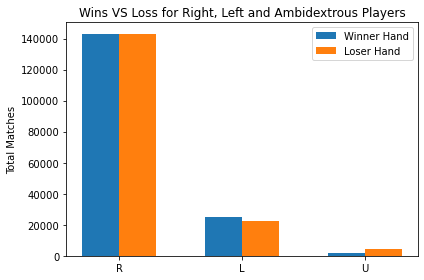

In [174]:
x = np.arange(len(hands.index)) 
width = 0.30 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hands['winner_hand'], width, label='Winner Hand')
rects2 = ax.bar(x + width/2, hands['loser_hand'], width, label='Loser Hand')


ax.set_ylabel('Total Matches')
ax.set_title('Wins VS Loss for Right, Left and Ambidextrous Players')
ax.set_xticks(x)
ax.set_xticklabels(hands.index)
ax.legend()

fig.tight_layout()

plt.show()

In [175]:
temp  = df[['winner_name', 'winner_hand']].drop_duplicates('winner_name')
temp["winner_hand"].value_counts()

R    2763
U     518
L     302
Name: winner_hand, dtype: int64

# since the above viz does not make sense, as it compares total matches (number of right-handed players is way more than left-handed and ambidextrous players), i created a graph showing win/loss % for all players'

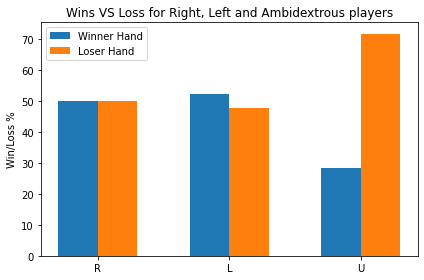

In [176]:
x = np.arange(len(hands.index)) 
width = 0.30 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, (hands['winner_hand']/hands['total_matches_played'])*100, width, label='Winner Hand')
rects2 = ax.bar(x + width/2, (hands['loser_hand']/hands['total_matches_played'])*100, width, label='Loser Hand')

ax.set_ylabel('Win/Loss %')
ax.set_title('Wins VS Loss for Right, Left and Ambidextrous players')
ax.set_xticks(x)
ax.set_xticklabels(hands.index)
ax.legend()

fig.tight_layout()

plt.show()

In [177]:
temp  = df[['winner_name', 'winner_hand']].drop_duplicates('winner_name')
temp["winner_hand"].value_counts()

R    2763
U     518
L     302
Name: winner_hand, dtype: int64

In [178]:
no_winners_hand = df['winner_hand'].value_counts()
no_losers_hand = df['loser_hand'].value_counts()
print (no_winners_hand)
print (no_losers_hand) 

R    143261
L     24769
U      1621
Name: winner_hand, dtype: int64
R    142806
L     22673
U      4126
Name: loser_hand, dtype: int64


In [179]:
df["winner_name_bool"] = df.winner_name.isin(['Rafael Nadal','Roger Federer','Novak Djokovic'])
fav_players_winner = df[(df["winner_name_bool"]==True)]

df["loser_name_bool"] = df.loser_name.isin(['Rafael Nadal','Roger Federer', 'Novak Djokovic'])
fav_players_loser = df[(df["loser_name_bool"]==True)]

In [180]:
winner_xyz= fav_players_winner[["winner_name","w_1stIn","tourney_year"]]['winner_name'].groupby(fav_players_winner['tourney_year']).value_counts()

In [181]:
winner_xyz.index.get_level_values(0)

Int64Index([1998, 1999, 2000, 2001, 2002, 2002, 2003, 2003, 2004, 2004, 2004,
            2005, 2005, 2005, 2006, 2006, 2006, 2007, 2007, 2007, 2008, 2008,
            2008, 2009, 2009, 2009, 2010, 2010, 2010, 2011, 2011, 2011, 2012,
            2012, 2012, 2013, 2013, 2013, 2014, 2014, 2014, 2015, 2015, 2015,
            2016, 2016, 2016, 2017, 2017, 2017, 2018, 2018, 2018, 2019, 2019,
            2019],
           dtype='int64', name='tourney_year')

In [182]:
winner_xyz = winner_xyz[~winner_xyz.index.get_level_values(0).isin([1998, 1999])]

In [183]:
winner_xyz.values

array([36, 49, 61,  1, 77, 14, 75, 30,  2, 81, 79, 11, 92, 60, 40, 75, 69,
       68, 78, 67, 64, 78, 68, 61, 71, 66, 63, 72, 70, 64, 75, 74, 42, 81,
       74, 48, 71, 65, 44, 83, 63, 61, 66, 40, 21, 67, 53, 33, 56, 49, 45,
        8,  7,  7])

In [184]:
df_winner = pd.DataFrame()
df_winner['Winner_Tourney_Year'] = winner_xyz.index.get_level_values(0)
df_winner['Winner_Player_Name'] = winner_xyz.index.get_level_values(1)
df_winner['Win_Serve_Count'] = winner_xyz.values
df_winner = df_winner[~df_winner['Winner_Tourney_Year'].isin([1998,1999])]
df_winner.reset_index(inplace = True, drop = True)

In [185]:
loser_xyz= fav_players_loser[["loser_name","l_1stIn","tourney_year"]]['loser_name'].groupby(fav_players_loser['tourney_year']).value_counts()

In [186]:
loser_xyz[~loser_xyz.index.get_level_values(0).isin([1998, 1999])]

tourney_year  loser_name    
2000          Roger Federer     30
2001          Roger Federer     21
2002          Roger Federer     23
              Rafael Nadal       1
2003          Roger Federer     16
              Rafael Nadal      11
2004          Rafael Nadal      18
              Roger Federer      6
              Novak Djokovic     3
2005          Novak Djokovic    11
              Rafael Nadal      10
              Roger Federer      4
2006          Novak Djokovic    18
              Rafael Nadal      12
              Roger Federer      5
2007          Novak Djokovic    19
              Rafael Nadal      16
              Roger Federer      9
2008          Novak Djokovic    17
              Roger Federer     16
              Rafael Nadal      10
2009          Novak Djokovic    19
              Rafael Nadal      14
              Roger Federer     12
2010          Novak Djokovic    18
              Roger Federer     13
              Rafael Nadal      10
2011          Rafael Nadal

In [187]:
df_loser = pd.DataFrame()
df_loser['Loser_Tourney_Year'] = loser_xyz.index.get_level_values(0)
df_loser['Loser_Player_Name'] = loser_xyz.index.get_level_values(1)
df_loser['Loss_Serve_Count'] = loser_xyz.values
df_loser = df_loser[~df_loser['Loser_Tourney_Year'].isin([1998,1999])]
df_loser.reset_index(inplace = True, drop = True)


In [188]:
merged_df = pd.concat([df_winner, df_loser],axis=1)


In [189]:
new_df = pd.merge(df_winner, df_loser,  how='left', left_on=['Winner_Tourney_Year','Winner_Player_Name'], right_on = ['Loser_Tourney_Year','Loser_Player_Name'])

In [190]:
new_df['Win_Percentage']= (new_df['Win_Serve_Count']/(new_df['Loss_Serve_Count']+new_df['Win_Serve_Count']))*100
new_df['Loss_Percentage']= 100.00- new_df['Win_Percentage']

# We can see the increase in performance for players throughtout the years

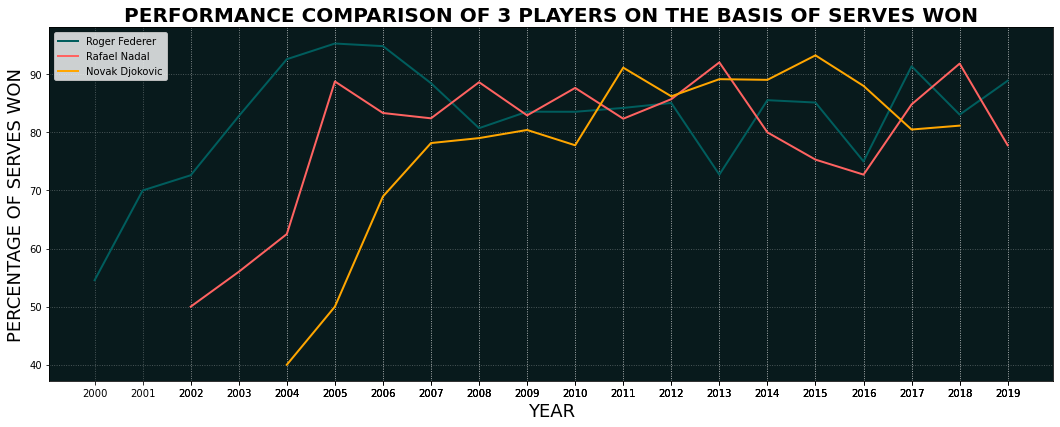

In [191]:
fig, ax = plt.subplots(figsize = (18,6.5))
ax.plot(new_df['Winner_Tourney_Year'][new_df['Winner_Player_Name'] == 'Roger Federer'], new_df['Win_Percentage'][new_df['Winner_Player_Name'] == 'Roger Federer'], label = 'Roger Federer', color= '#005d5d', linewidth= 2) 
ax.plot(new_df['Winner_Tourney_Year'][new_df['Winner_Player_Name'] == 'Rafael Nadal'], new_df['Win_Percentage'][new_df['Winner_Player_Name'] == 'Rafael Nadal'], label = 'Rafael Nadal', color= '#ff6361', linewidth= 2) 
ax.plot(new_df['Winner_Tourney_Year'][new_df['Winner_Player_Name'] == 'Novak Djokovic'], new_df['Win_Percentage'][new_df['Winner_Player_Name'] == 'Novak Djokovic'], label = 'Novak Djokovic', color= '#ffa600', linewidth= 2
) 


ax.set_xticks(new_df['Winner_Tourney_Year'])


plt.title('PERFORMANCE COMPARISON OF 3 PLAYERS ON THE BASIS OF SERVES WON', fontsize=20, fontweight='bold')

ax.set_facecolor('#081a1c') 

ax.grid(b = False, color ='white',
        linestyle ='dotted', linewidth = 0.9,
        alpha = 0.3, zorder = 1)

    
ax.set_ylabel('PERCENTAGE OF SERVES WON', fontsize= 18)
ax.set_xlabel('YEAR', fontsize= 18)

ax.legend()


# Created the above graph using Plotly to make it interactive

In [192]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

fig = px.line(new_df, x=list(new_df['Winner_Tourney_Year']), y=list(new_df['Win_Percentage']),color = 'Winner_Player_Name',
              labels={
                     "Winner_Player_Name": "PLAYER NAME"
                 })

fig.update_layout(
    title_text="PERFORMANCE COMPARISON OF 3 PLAYERS ON THE BASIS OF SERVES WON",
    xaxis_title="YEAR",
    yaxis_title="PERCENTAGE OF SERVES WON"
)
 

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()